In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
#!pip install setuptools==58

In [46]:
#!pip install regressors

In [4]:
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Dataset

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
header=None,
sep='\s+'
)

df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Conociendo el Dataset

In [7]:
df.shape

(506, 14)

In [8]:
#Datos nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Tipo de datos
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<AxesSubplot: >

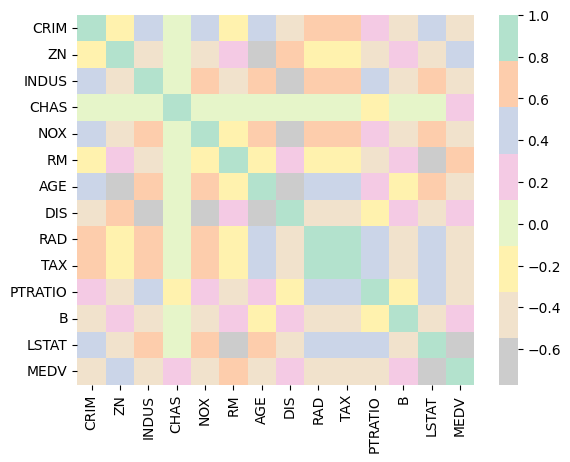

In [10]:
#correlacion entre variables
sns.heatmap(df.corr(),cmap='Pastel2_r',annot=False,cbar=True)

Las variables que utilizaré para predecir el MEDV en un primer modelo serán las que tengan una correlación mayor o igual a 4 o menor o igual a -4.

In [11]:
#valores unicos por variable
my_dict  = {}

for i in list(df.columns):
    my_dict[i] = df[i].value_counts().shape[0]


pd.DataFrame(my_dict,index=['unique']).transpose()

,unique
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
cols_to_use = ['RM','LSTAT','ZN','INDUS','CRIM','TAX','PTRATIO','AGE']
col_to_predict = ['MEDV']

## Distribuciones de variables de interes

<AxesSubplot: xlabel='INDUS', ylabel='Count'>

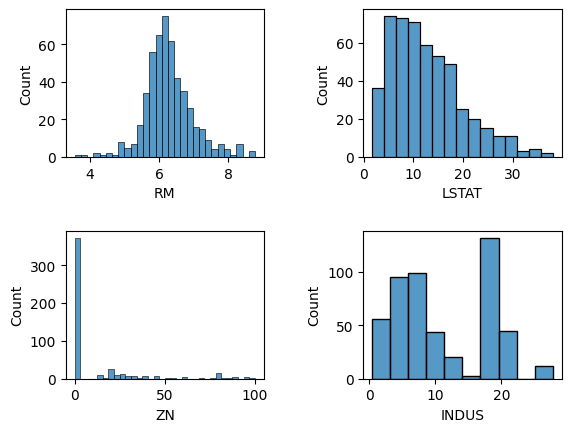

In [15]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#ax0
sns.histplot(ax=ax0,data=df,x='RM')

#ax1
sns.histplot(ax=ax1,data=df,x='LSTAT')
#ax2
sns.histplot(ax=ax2,data=df,x='ZN')
#ax3
sns.histplot(ax=ax3,data=df,x='INDUS')

<AxesSubplot: xlabel='AGE', ylabel='Count'>

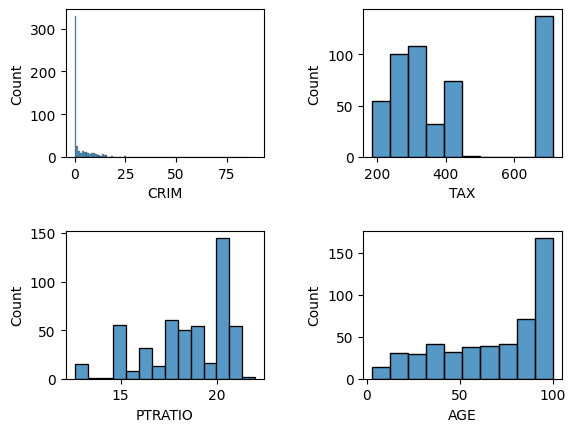

In [16]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#ax0
sns.histplot(ax=ax0,data=df,x='CRIM')

#ax1
sns.histplot(ax=ax1,data=df,x='TAX')
#ax2
sns.histplot(ax=ax2,data=df,x='PTRATIO')
#ax3
sns.histplot(ax=ax3,data=df,x='AGE')

<AxesSubplot: xlabel='MEDV', ylabel='Count'>

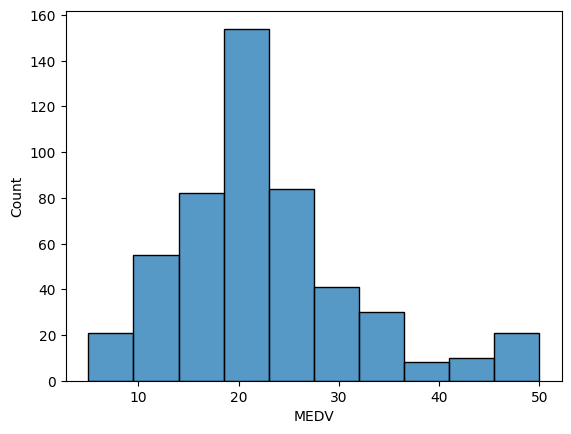

In [17]:
sns.histplot(df,x='MEDV',bins=10)

# Librerias para los modelos

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Primer modelo

In [19]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [20]:


x_cols = cols_to_use
y_col = col_to_predict

x = df[x_cols].values
y = df[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression()
model.fit(x_train,y_train)

   


LinearRegression()

In [21]:
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

In [22]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 8) x_test shape: (127, 8)
ytrain shape: (379, 1) y_test shape: (127, 1)


## Metricas para primer modelo

In [23]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.269
r2:
0.704


In [24]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [25]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median     3Q    Max
-1.9501 -0.1756  0.1045 0.3686 1.3161


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.004994    0.046354   0.1077  0.914380
RM          0.343104    0.061490   5.5798  0.000000
LSTAT      -0.460802    0.076896  -5.9926  0.000000
ZN         -0.015014    0.065901  -0.2278  0.820154
INDUS      -0.017194    0.071025  -0.2421  0.809106
CRIM       -0.073645    0.068315  -1.0780  0.283086
TAX        -0.001510    0.070362  -0.0215  0.982912
PTRATIO    -0.196146    0.057347  -3.4204  0.000843
AGE         0.069171    0.065246   1.0601  0.291105
---
R-squared:  0.70395,    Adjusted R-squared:  0.68388
F-statistic: 35.07 on 8 features


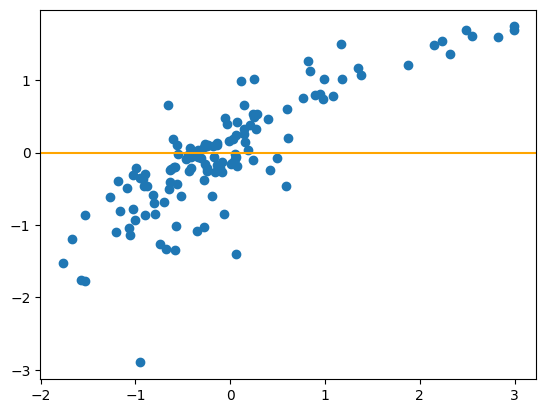

In [26]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.axhline(y=0,color='orange')

## Segundo modelo quitando variables Pvalues

In [27]:
new_cols = ['RM','LSTAT','PTRATIO']

In [28]:
x_cols = new_cols
y_col = col_to_predict

x = df[x_cols].values
y = df[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 3) x_test shape: (127, 3)
ytrain shape: (379, 1) y_test shape: (127, 1)


In [30]:
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

## Metricas segundo modelo

In [31]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.391
r2:
0.703


In [32]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [33]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median     3Q    Max
-2.2139 -0.4752 -0.0278 0.2777 1.2166


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.040060    0.056292  -0.7116  0.478002
RM          0.288668    0.058842   4.9058  0.000003
LSTAT      -0.489581    0.067353  -7.2689  0.000000
PTRATIO    -0.186427    0.057145  -3.2623  0.001422
---
R-squared:  0.70345,    Adjusted R-squared:  0.69621
F-statistic: 97.26 on 3 features


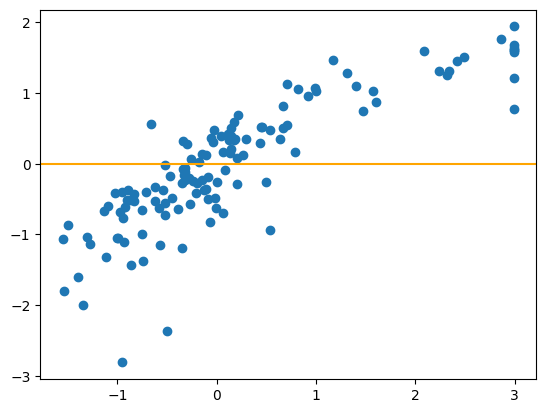

In [34]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.axhline(y=0,color='orange')

## Tercer modelo 

In [35]:
df_plus = df.copy()
df_plus['over_tax'] = (df_plus.TAX >= 500).astype(int)
df_plus['rm_over_tax'] = df_plus.RM * df_plus.over_tax


In [36]:
df_plus

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,over_tax,rm_over_tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0,0.0


### Columnas utilizadas

In [37]:
new_cols = ['RM','LSTAT','PTRATIO','rm_over_tax','over_tax']

In [38]:
x_cols = new_cols
y_col = col_to_predict

x = df_plus[x_cols].values
y = df_plus[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 5) x_test shape: (127, 5)
ytrain shape: (379, 1) y_test shape: (127, 1)


In [40]:
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

## Metricas tercer modelo

In [41]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.175
r2:
0.789


In [42]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [43]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median     3Q    Max
-1.6588 -0.1543  0.0616 0.2956 1.2804


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept   0.007168    0.037454   0.1914  0.848529
RM           0.552238    0.051601  10.7020  0.000000
LSTAT       -0.430122    0.049912  -8.6177  0.000000
PTRATIO     -0.170561    0.045446  -3.7531  0.000265
rm_over_tax -2.307419    0.308568  -7.4778  0.000000
over_tax     2.330247    0.311637   7.4774  0.000000
---
R-squared:  0.78903,    Adjusted R-squared:  0.78031
F-statistic: 90.51 on 5 features


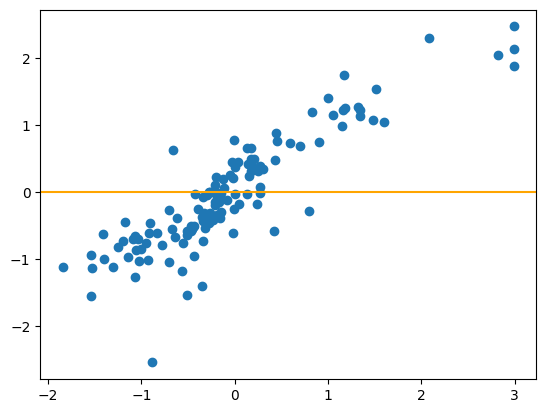

In [44]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred)
plt.axhline(y=0,color='orange')

## Observaciones

- El tercer modelo tiene un MSE más bajo y un r2 más cercano a 1

- añadiendo una variable con tax mayores a 500 nos ayudó a que el modelo hiciera mejores predicciones 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab9de7b5-4992-4d12-9e36-e4f4e874d015' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>